In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("crime_safety_dataset.csv")
df.head(4)

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [6]:
df.describe()

,id,victim_age
count,1000.000000,1000.000000
mean,500.500000,52.201000
std,288.819436,22.913831
min,1.000000,12.000000
25%,250.750000,33.000000
50%,500.500000,53.000000
75%,750.250000,72.000000
max,1000.000000,90.000000


In [7]:
df.isnull().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

In [8]:
df.colums = df.columns.str.strip().str.lower().str.replace(' ','_')

C:\Users\Dell\AppData\Local\Temp\ipykernel_3812\2081904028.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.strip().str.lower().str.replace(' ','_')


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

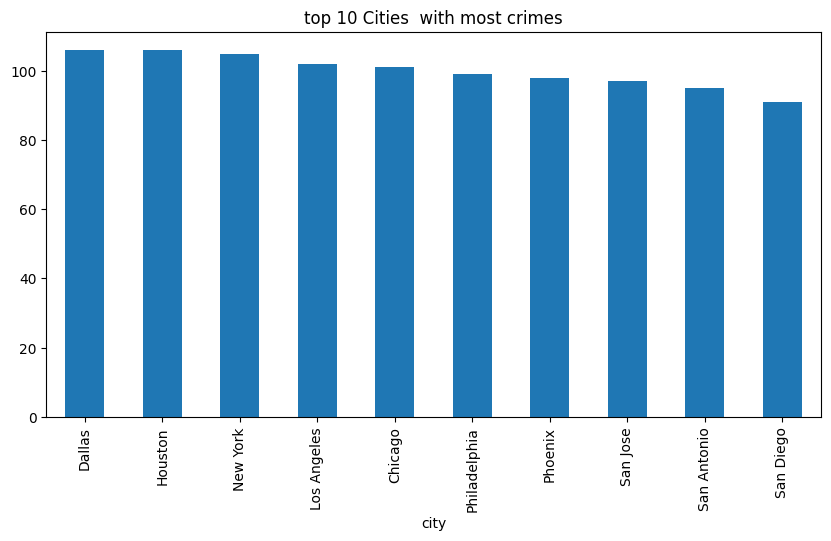

In [10]:
plt.figure(figsize=(10,5))
df['city'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 Cities  with most crimes')
plt.ylable('Crime count')
plt.xticks(rotation=45)
plt.show()

In [13]:
df['date'] = pd.to_datetime(df['date']) 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

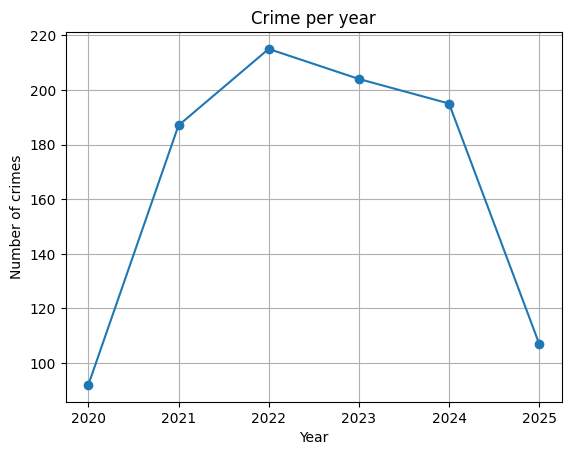

In [16]:
df['year'].value_counts().sort_index().plot(kind= 'line', marker='o')
plt.title('Crime per year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.grid(True)
plt.show()

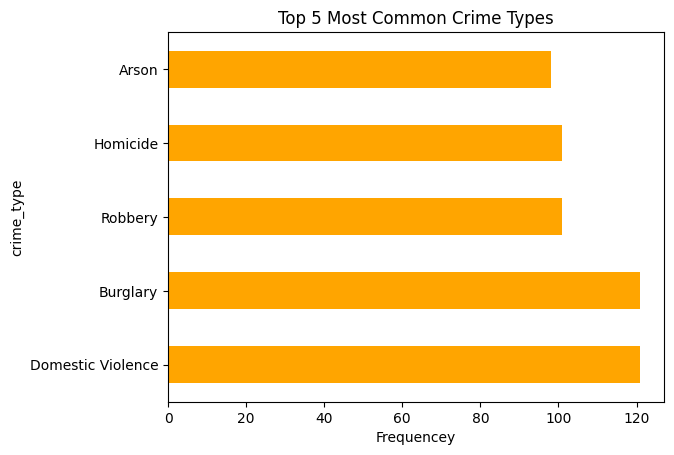

In [21]:
df['crime_type'].value_counts().head(5).plot(kind='barh',color='orange')
plt.title('Top 5 Most Common Crime Types')
plt.xlabel('Frequencey')
plt.show()

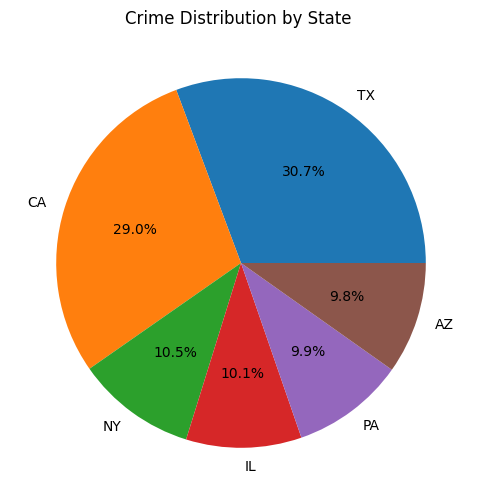

In [19]:
df['state'].value_counts().plot(kind='pie',autopct='%1.1f%%' , figsize=(6,6))
plt.title('Crime Distribution by State ')
plt.ylabel('')
plt.show()

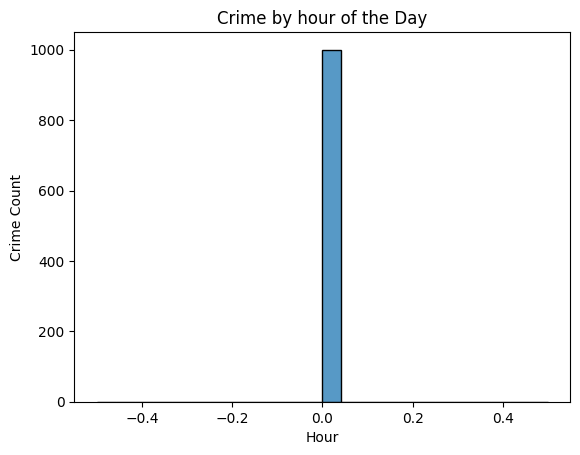

In [23]:
df['hour'] = df['date'].dt.hour
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Crime by hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.show()

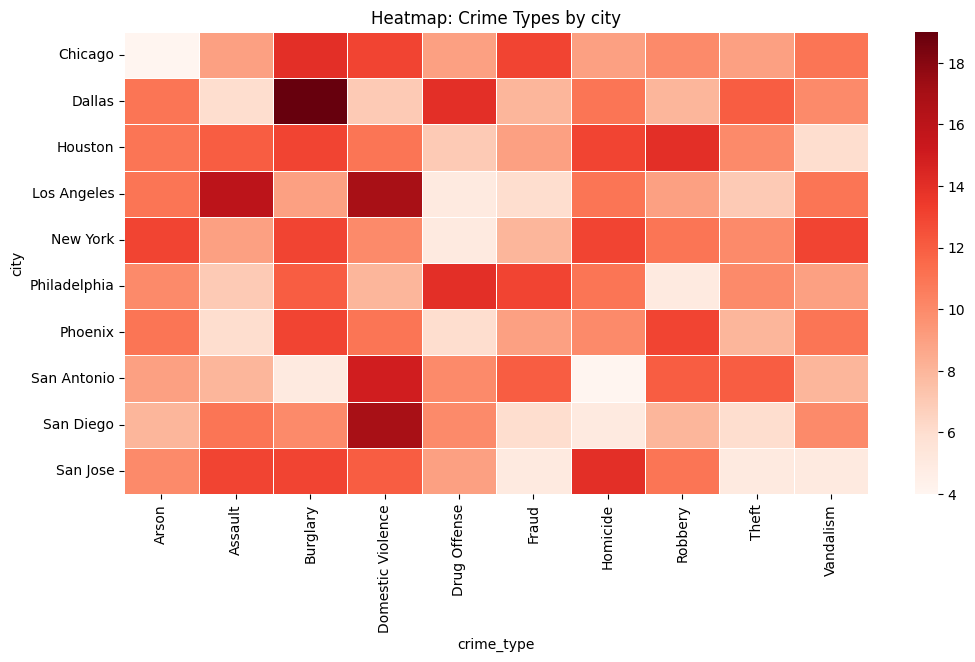

In [25]:
city_crime_matrix = pd.crosstab(df['city'], df['crime_type'])
plt.figure(figsize=(12,6))
sns.heatmap(city_crime_matrix, cmap='Reds', linewidths=0.5)
plt.title('Heatmap: Crime Types by city')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3812\1060259975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= 'victim_gender',palette = 'Set2')


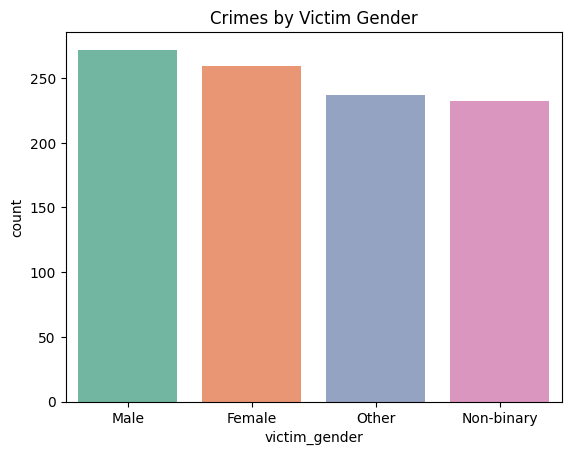

In [30]:
sns.countplot(data=df, x= 'victim_gender',palette = 'Set2')
plt.title('Crimes by Victim Gender')
plt.show()

In [28]:
df.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race',
       'year', 'month', 'hour'],
      dtype='object')

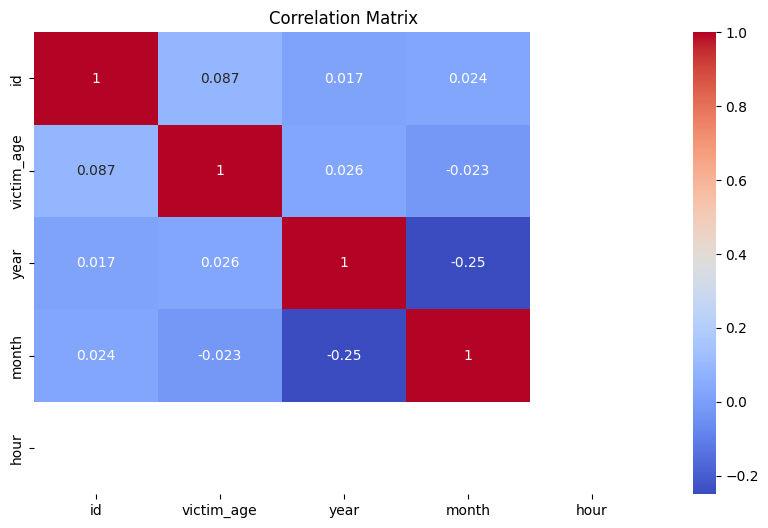

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only = True),annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()